In [1]:
# CAN REMOVE
%matplotlib inline
%load_ext autoreload


#General imports
import numpy as np
import os
import pickle
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

# Import MNE, as well as the MNE sample dataset
import mne
from mne import io
from mne.datasets import sample
from mne.viz import plot_topomap

# FOOOF imports
from fooof import FOOOF, FOOOFGroup

In [2]:
# Import custom code for this analysis
% autoreload 2
from plots import *
from utilities import *
from analysis import *

In [35]:
fg = FOOOFGroup(peak_width_limits=[1, 6], min_peak_amplitude=0.075,
                    max_n_peaks=6, peak_threshold=1, verbose=False)

In [67]:
raw_fname = sample.data_path() + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = sample.data_path() + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

Successfully extracted to: ['C:\\Users\\abc\\mne_data\\MNE-sample-data']
Successfully extracted to: ['C:\\Users\\abc\\mne_data\\MNE-sample-data']


In [76]:
eeg_dat = mne.io.read_raw_fif(raw_fname)
eeg_dat = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')


Opening raw data file C:\Users\abc\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:178: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(tag_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:363: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  version=int(np.fromstring(fid.read(4), dtype=">i4")),
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:364: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  machid=np.fromstring(fid.read(8), dtype=">i4"),
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:365: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  secs=int(np.fromstring(fid.read(4), dtype=">i4")),
C:\Users\a

    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:407: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  coil_type=int(np.fromstring(fid.read(4), dtype=">i4")),
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:409: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  loc=np.fromstring(fid.read(48), dtype=">f4").astype(np.float64),
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:411: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  unit=int(np.fromstring(fid.read(4), dtype=">i4")),
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:412: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  unit_mul=int(np.fromstring(fid.read(4), dtyp

In [77]:
eeg_dat.info

<Info | 20 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float64 | 13.319680877225858
    ch_names : list | EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, ...
    chs : list | 59 items (EEG: 59)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 59
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    

In [78]:
eeg_dat.set_eeg_reference()

The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
An average reference projection was already added. The data has been left untouched.


<ipython-input-78-0dfefdcbbcf8>:1: DeprecationWarning: The behavior of set_eeg_reference will change in 0.16 when ref_channels="average". Currently, a projection is computed, which has to be applied manually with the apply_proj method. In 0.16, the average reference will be directly applied. Set projection=True if you want to retain the old behavior, or set projection=False if you want the new behavior.
  eeg_dat.set_eeg_reference()
<ipython-input-78-0dfefdcbbcf8>:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  eeg_dat.set_eeg_reference()


<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 59 x 41700 (277.7 sec), ~21.8 MB, data loaded>

In [79]:
# ICA settings
method = 'fastica'
n_components = 0.99
random_state = 47
reject = {'eeg': 20e-4}

# Initialize ICA object
ica = ICA(n_components=n_components, method=method, random_state=random_state)

# High-pass filter data for running ICA
eeg_dat.filter(l_freq=1., h_freq=None, fir_design='firwin');

# Fit ICA
ica.fit(eeg_dat, reject=reject)

# Find components to drop, based on correlation with EOG channels
drop_inds = []
for chi in EOG_CHS:
    inds, scores = ica.find_bads_eog(eeg_dat, ch_name=chi, threshold=2.5,
                                     l_freq=1, h_freq=10, verbose=False)
    drop_inds.extend(inds)
drop_inds = list(set(drop_inds))

# Set which components to drop, and collect record of this
ica.exclude = drop_inds
#dropped_components[s_ind, 0:len(drop_inds)] = drop_inds

# Save out ICA solution
ica.save(pjoin(ICA_PATH, str(sub) + '-ica.fif'))

# Apply ICA to data
eeg_dat = ica.apply(eeg_dat);

NameError: name 'ICA' is not defined

In [80]:
events = mne.find_events(eeg_dat)
epochs = mne.Epochs(eeg_dat, events=events)

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

In [74]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()



mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp,
                    event_id=event_id);

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

In [22]:
psd, freqs = mne.time_frequency.psd_welch(epochs, fmin=1., fmax=50., n_fft=2000, n_overlap=105, n_per_seg=500)

Loading data for 319 events and 106 original time points ...


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


Effective window size : 13.320 (s)


In [24]:
fooof_psd = np.squeeze(psd[3,:,:])

In [25]:
fooof_psd.shape

(364, 652)

In [ ]:
# Setting frequency range
freq_range = [3, 32]

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 32 Hz                        
                                 Frequency Resolution is 0.08 Hz                                  
                                                                                                  
                             Background Parameters (offset, slope):                               
                                         -23.3713, 1.8212                                         
                                                                                                  
                                       5 peaks were found:                                        
          

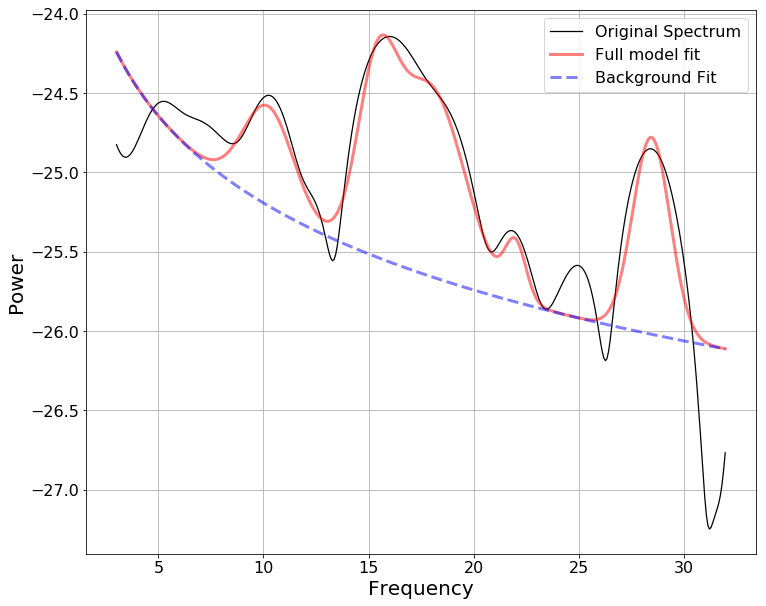

In [28]:
## Initialzing FOOOF model
fm = FOOOF(peak_width_limits=[1, 6], min_peak_amplitude=0.075, max_n_peaks=6, peak_threshold=1)

# I THINK IT IS BROKEN HERE ##
fm.report(freqs, fooof_psd[1 , :], freq_range)

In [29]:
# Run FOOOF across a group of PSDs
fg.fit(freqs, fooof_psd, freq_range)

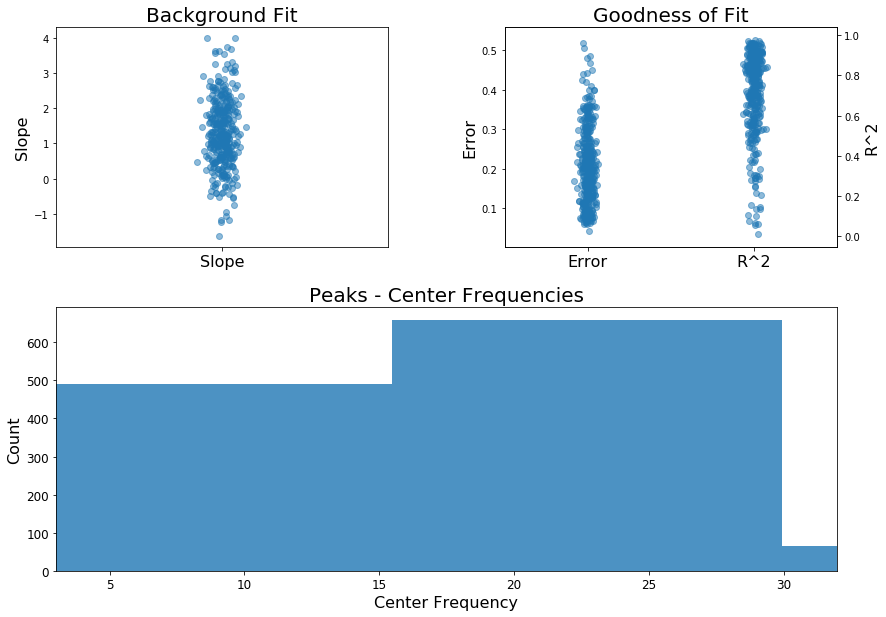

In [30]:
fg.plot()

In [36]:
fooof_psd.shape

(364, 652)

In [32]:
n_channels, n_freq = fooof_psd.shape

In [37]:
# Set up indexes for accessing data, for convenience
cf_ind, am_ind, bw_ind = 0, 1, 2
n_feats = 3

# Define bands of interest
bands = {'theta': [2,7],
         'alpha': [8,14],
         'beta': [15,30]}

In [46]:
num_blocks = len(mne.find_events(eeg_dat))
num_blocks

C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


319 events found
Events id: [ 1  2  3  4  5 32]


C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)
C:\Users\abc\Anaconda3\lib\site-packages\mne\io\tag.py:174: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  out = np.fromstring(fid.read(read_size), dtype=dtype)


319

In [47]:
slope_results = np.zeros(shape=[num_blocks, n_channels, 2])
results = {}
for band_name in bands.keys():
    results[band_name] = np.zeros(shape=[ num_blocks, n_channels, n_feats])

In [48]:
for block in range(0, num_blocks):
    for ind, res in enumerate(fg):
        slope_results[sub_index, block, ind, :] = res.background_params
        for band_label, band_range in bands.items():
            results[band_label][sub_index, block, ind,  :] = get_band_peak(res.peak_params, band_range, True)

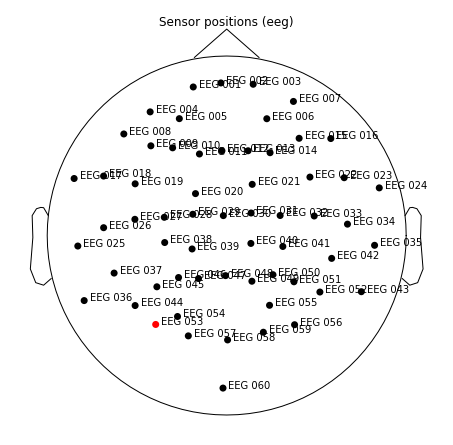

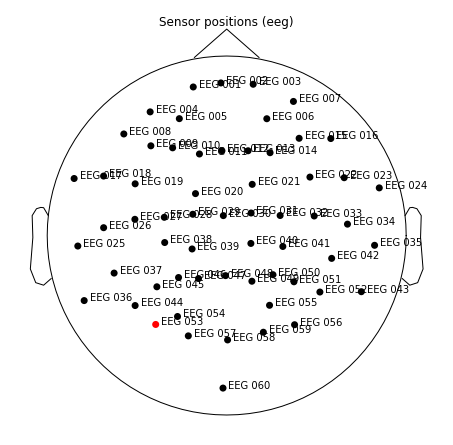

In [55]:
eeg_dat.plot_sensors(show_names=True, ch_type='eeg')

In [62]:
eeg_dat.info

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : float64 | 13.319680877225858
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 3 items
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : ndarray | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    hpi_subsystem 

In [61]:
montage = mne.channels.read_montage('standard_1020', eeg_dat.ch_names)
eeg_dat.set_montage(montage)

ValueError: not enough values to unpack (expected 2, got 0)

In [53]:
# Make topos, for each state, within and between datasets, for all features and bands
spatial_corr_ = make_topos_dict(results, label="spatial_corr", eeg_dat_info=eeg_dat.info, pos=pos, save_fig=SAVE_FIGS)
spatial_slope_corr = make_topos_array(slope_results, label="slope_spatial_corr", eeg_dat_info=eeg_dat.info, pos=pos,
                                            feats=['Offsets', 'Slope'], save_fig=SAVE_FIGS)

NameError: name 'pos' is not defined

In [51]:
def make_topos_dict(datasets, label, eeg_dat_info, pos, save_fig=True):
    """
    Creates spatial topographical plots for given dataset
    datasets: list of dict of 4d arrays
    label: str
    eeg_dat_info: str
    pos: int
    save_fig: boolean
    """

    bands = datasets[0].keys()
    feats = ["CFS", "AMPS", "BWS"]

    corr_dicts = []

    for band in bands:

        cur_data = [dataset[band] for dataset in datasets]
        corr_dicts.append(make_topos_array(cur_data, label + '_' + band,
                          eeg_dat_info, pos, feats, save_fig))

    space_corr_dict = comb_dicts(corr_dicts)

    return space_corr_dict


def make_topos_array(datasets, label, eeg_dat_info, pos, feats, save_fig=True):
    """
    Creates an array of values associated with an FOOOF features at given positions
    datasets: list of dict of 4d arrays
    label: str
    eeg_dat_info: str
    pos: int
    save_fig: boolean 
    """

    space_corr_dict = dict()

    for feat_in, feat in enumerate(feats):

        print('CURRENT FEATURE:', feat)

        topo_dat = np.zeros(shape=[2, 64])

        for ind, dataset in enumerate(datasets):
            topo_dat[ind, :] =  avg_for_topo(dataset, feat_in)

        # Calculate the average data across groups
        avg_dat = np.mean(topo_dat, 0)

        ## Plot topographies - within and across datasets
        plot_topo(topo_dat[0, :], title='D1' + label + feat, eeg_dat_info=eeg_dat_info, save_fig=save_fig)
        plot_topo(topo_dat[0, :], title='D2'+ label + feat, eeg_dat_info=eeg_dat_info, save_fig=save_fig)
        plot_topo(avg_dat, title='Both_' + label + feat, eeg_dat_info=eeg_dat_info, save_fig=save_fig)

        ## Plot scatter plots - across datasets for Ant-Pos & Med-Lat
        plot_space_scatter(avg_dat, abs(pos[:, 0]), 'Both_' + label + feat + "_medial_to_lateral_plot",
                           xlabel='Medial -> Lateral' , ylabel=feat, save_fig=save_fig)
        plot_space_scatter(avg_dat, pos[:, 1], 'Both_' + label + feat + "_posterior_to_anterior_plot",
                           xlabel='Posterior -> Anterior' , ylabel=feat, save_fig=save_fig)

        space_corr_dict['Both_' + label + '_' +  feat +'_' + "M_L"] = \
            pearsonr(abs(pos[:, 0]), np.nanmedian(topo_dat,0))
        space_corr_dict['Both_' + label + '_' +  feat + '_' + "P_A"] = \
            pearsonr(pos[:, 1], np.nanmedian(topo_dat,0))

    return space_corr_dict

In [50]:
def plot_topo(data, title, eeg_dat_info, save_fig=True):
    """
    data: 1d array, len number of channels
    title: str
    eeg_dat_info: MNE object
    save_fig: bool
    """

    inds = np.where(np.isnan(data))
    data[inds] = np.nanmean(data)

    vbuffer = 0.1 * (data.max() - data.min())
    vmin, vmax,  = data.min() - vbuffer, data.max() + vbuffer

    fig, ax = plt.subplots()
    mne.viz.plot_topomap(data, eeg_dat_info, vmin=vmin, vmax=vmax,
                         cmap=cm.viridis, contours=0, axes=ax)

    plot_topo_colorbar(vmin, vmax, title, save_fig)

    # This is saved differently because of MNE quirks
    if save_fig:
        fig_save_path = 'C:\\Users\\abc\\Documents\\Research\\figures'
        fig.savefig(os.path.join(fig_save_path, title + '.png'), dpi=600)


def plot_topo_colorbar(vmin, vmax, label, save_fig=True):
    """
    Create a colorbar for the topography plots
    vmin: int
    vmax: int
    label: str
    saave_fig: bool
    """
    fig = plt.figure(figsize=(2, 3))
    ax1 = fig.add_axes([0.9, 0.25, 0.15, 0.9])

    cmap = cm.viridis
    norm = colors.Normalize(vmin=vmin, vmax=vmax)

    cb1 = colorbar.ColorbarBase(plt.gca(), cmap=cmap,
                                norm=norm, orientation='vertical')

    save_figure(save_fig, label + '_cb')



In [33]:
fooof_results = np.zeros(shape = [n_channels,3])

In [34]:
for i, ch_dat in enumerate(fg.group_results):
    fooof_results[i,:] = get_band_osc(ch_dat.oscillations_params, [8, 12])

NameError: name 'get_band_osc' is not defined

In [ ]:
cfs = fooof_results[:, 0]
amps = fooof_results[:, 1]
bws = fooof_results[:,2]

cfs = np.nan_to_num(cfs)
amps = np.nan_to_num(amps)
bws = np.nan_to_num(bws)

In [ ]:
# Define our oscillation bands
bands = [['Theta', [4, 8]], ['Alpha', [8, 12]]]

In [12]:
# Settings for exploring an example channel of data
ch_label = 'EEG 058'
t_start = 20000
t_stop = int(t_start + (10 * fs))

In [14]:
# Extract an example channel to explore
sig, times = raw.get_data(mne.pick_channels(raw.ch_names, [ch_label]),
                          start=t_start, stop=t_stop, return_times=True)
sig = np.squeeze(sig)

In [15]:
sig

array([2.57631759e-05, 2.94824294e-05, 3.04336265e-05, ...,
       3.61403774e-05, 2.87187175e-05, 2.06047879e-05])

In [16]:
sig.shape

(1501,)

In [17]:
make_topos_dict?